In [1]:
import tensorflow as tf
print('Tensorflow Version:', tf.__version__)

Tensorflow Version: 2.19.0


In [2]:
mnist = tf.keras.datasets.mnist

(x_train , y_train) , (x_test , y_test) = mnist.load_data()
x_train , x_test = x_train/255.0 , x_test/255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [10]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [11]:
model.compile(optimizer='adam', loss= loss_function , metrics=['accuracy'])

In [12]:
model.fit(x_train , y_train , epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8540 - loss: 0.4880
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9631 - loss: 0.1238
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9738 - loss: 0.0858
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9792 - loss: 0.0673
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9831 - loss: 0.0532


In [13]:
model.evaluate(x_test , y_test , verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9788 - loss: 0.0759


[0.07586560398340225, 0.9787999987602234]

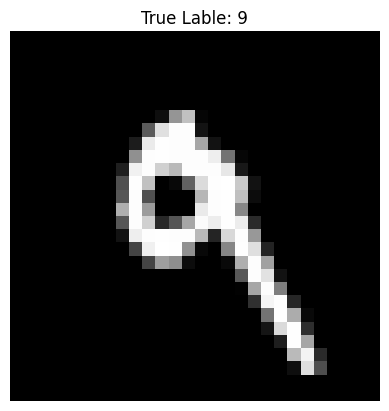

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Lable: 9


In [21]:
import matplotlib.pyplot as plt
import numpy as np

index=7
sample = x_test[index]
true_lable = y_test[index]


plt.imshow(sample , cmap='gray')
plt.title(f'True Lable: {true_lable}')
plt.axis('off')
plt.show()

sample_input = sample.reshape(1,28,28)
predicted_lable = model.predict(sample_input)
predicted_lable = np.argmax(predicted_lable)
print(f'Predicted Lable: {predicted_lable}')